In [7]:
from src import hyperparam_analysis, flops_in_folder
import wandb
import json

### Overall Flops in this Notebook:

In [8]:
_, _, _ = flops_in_folder('results/Hyperparam')

Number of unique result files: 10
Total Training FLOPs: 3.597e+16
Total Evaluation FLOPs: 5.125e+15
Total Combined FLOPs: 4.109e+16
Percentage of Total FLOPs Budget:   41.093 %


# Hyperparameter Tuning (Non Grid Search for Efficiency and Compute Reasons)
---
- In the previous notebook, we showed the model was able to learn and generalise well over the data

---

- I now aim to preform hyperparameter tuning by analysing the models preformance over an suggested range
- If compute (FLOPS) was not a limiting factor this could be investigated over a whole grid search.
- However inorder to reduce unnecesarry tests this is preformed in 1 Dimensional Axis rather than a 2D/ £D grid search

---
- During the initial hyperparameter tuning before exploring token length, I use a default token length of 256 as this will half my compute during hyperparameter testing and allow me to trial for longer periods and more hyperparameter test 

### The default setting of tuning:

| Parameter                           | Value  |
| :------------------------------- | :-- |
| No of validation batches evaluated at every step | 25  |
| Evaluation Frequency             | 25  |
| Max Training Steps               | 800 |
| Batch size                       | 4   |
| Early Stopping Patience          | High to stop comparable scores unless definite |

# **Investigation 1:** 
## Initial Investigation Into Decimal Places

- I use my initial use of compute to preform a very short investigation into the number of significant figures than I should use when training the model.

## **Several thoughts on this matter:**
### Higher Decimal Places vs Lower Decimal Places
- A higher degree of precision would all the model to potential train to a higher degree of accuracy and thus over a longer period be able to learn the global distribution to a greater extent.
- It would increase the number of tokens used per data point and thus reduce trajectory length in each batch of data shown to the model.
- In cross entropy loss as we are comparing logits individuals catagorical loss, then model cannot distinguish between the error at the 3rd degree of precision to the fourth thus the following error (at a very basic level) would potentially lead to the same loss. 
- Overall you would **expect the loss to be higher** as it is penalising smaller margins that a lower precision wouldnt even notice.
- Thus comparing the loss of models is not necessarily fair.

| Data  | Result | Effect                                                                                                 |
| :---- | :----- | :----------------------------------------------------------------------------------------------------- |
| Truth | 3.44   | N/A                                                                                                    |
| Gen1  | 3.54   | Wrong on 1/4 of tokens                                                                                 |
| Gen2  | 3.45   | Wrong on 1/4 of tokens (potentially same error despite being a smaller error) |


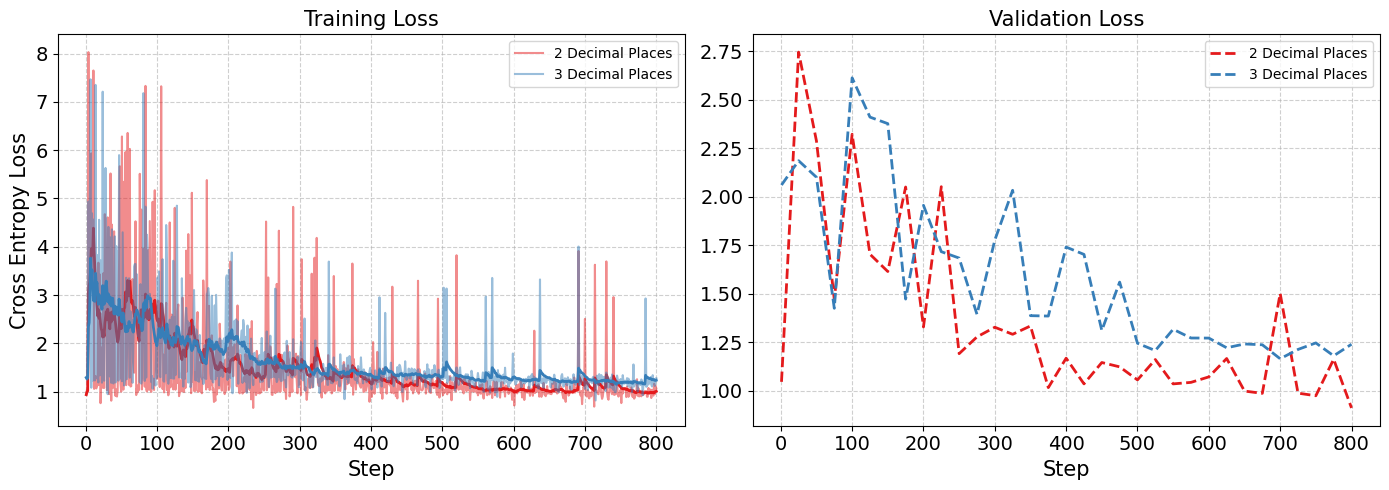

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,2 Decimal Places,2.841555e+15,4.345211e+14,3.276076e+15,1.024661
1,3 Decimal Places,2.841555e+15,4.691526e+14,3.310707e+15,1.237398


In [9]:
# Import the data from the results/Hyperparam/Hyperparam/Hyperparam_Decimal
Hyperparam_Decimal_2_Path = 'results/Hyperparam/Hyperparam_Decimal/DP2Learn1e-05Lora4Token256.json'
Hyperparm_Decimal_3_Path = 'results/Hyperparam/Hyperparam_Decimal/DP3Learn1e-05Lora4Token256.json'
Path_list_Dec = [Hyperparam_Decimal_2_Path, Hyperparm_Decimal_3_Path]
Name_list_Dec = ['2 Decimal Places', '3 Decimal Places']
hyperparam_analysis(Path_list_Dec, Name_list_Dec)

# **Investigation 2:**
## Learning Rate (constant lora rank = 4, Decimal Place = 2)

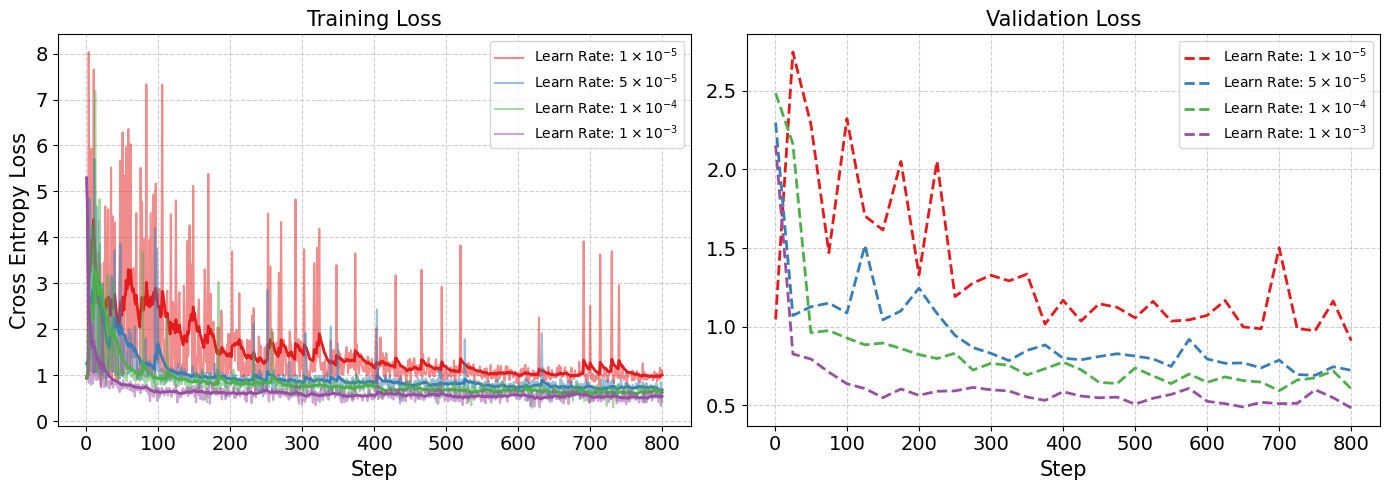

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Learn Rate: $1 \times 10^{-5}$,2.841555e+15,4.345211e+14,3.276076e+15,1.024661
1,Learn Rate: $5 \times 10^{-5}$,2.841555e+15,4.345211e+14,3.276076e+15,0.721130
2,Learn Rate: $1 \times 10^{-4}$,2.841555e+15,4.345211e+14,3.276076e+15,0.630856
3,Learn Rate: $1 \times 10^{-3}$,2.841555e+15,4.345211e+14,3.276076e+15,0.531184


In [10]:
# Import the data from the results/Hyperparam/Hyperparam/Hyperparam_Decimal
Hyperparam_LR_1_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn1e-05Lora4Token256.json'
Hyperparam_LR_2_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn5e-05Lora4Token256.json'
Hyperparam_LR_3_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn0.0001Lora4Token256.json'
Hyperparam_LR_4_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn0.001Lora4Token256.json'
Path_list_LR = [Hyperparam_LR_1_Path, Hyperparam_LR_2_Path, Hyperparam_LR_3_Path, Hyperparam_LR_4_Path]
Name_list_LR = [r'Learn Rate: $1 \times 10^{-5}$', r'Learn Rate: $5 \times 10^{-5}$', r'Learn Rate: $1 \times 10^{-4}$', r'Learn Rate: $1 \times 10^{-3}$']
hyperparam_analysis(Path_list_LR, Name_list_LR)

### **RESULTS**:
- Clear peferance at $1\times 10^{-3}$

# **Investigation 3:**
## Lora Rate (constant Learning Rate = 0.001, Decimal Place = 2)

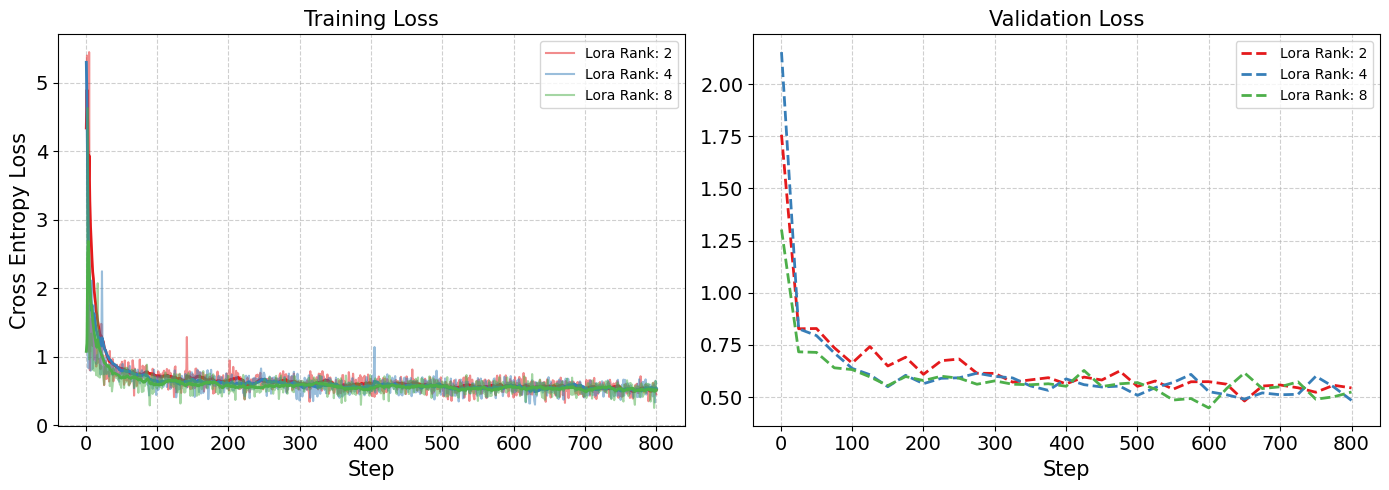

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Lora Rank: 2,2.840710e+15,4.343918e+14,3.275101e+15,0.552826
1,Lora Rank: 4,2.841555e+15,4.345211e+14,3.276076e+15,0.531184
2,Lora Rank: 8,2.843246e+15,4.347796e+14,3.278025e+15,0.523926


In [11]:
# Import the data from the results/Hyperparam_Decimal
Hyperparam_Lora2_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora2Token256.json'
Hyperparam_Lora4_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora4Token256.json'
Hyperparam_Lora8_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora8Token256.json'

Path_list_Lora = [Hyperparam_Lora2_Path, Hyperparam_Lora4_Path, Hyperparam_Lora8_Path]
Name_list_Lora = [r'Lora Rank: 2', r'Lora Rank: 4', r'Lora Rank: 8']
hyperparam_analysis(Path_list_Lora, Name_list_Lora)

# **Investigation 4:**
## Token (Context) Length (constant: Lora Rank = 8, Learning Rate = 0.001, Decimal Place = 2)

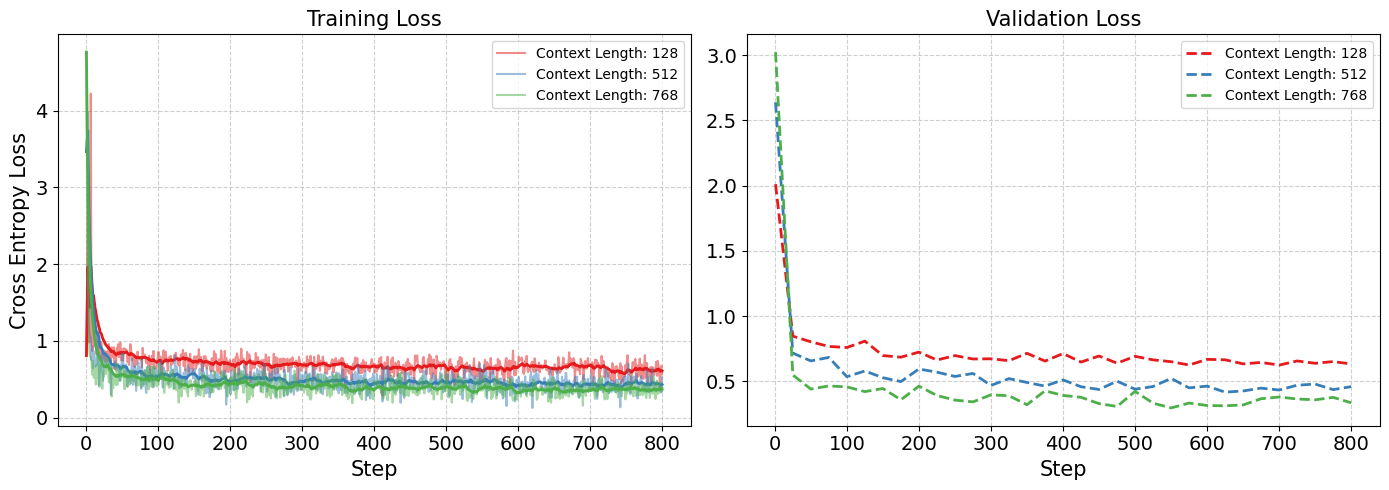

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Context Length: 128,1.407459e+15,3.031902e+14,1.710650e+15,0.629477
1,Context Length: 512,5.799798e+15,7.056421e+14,6.505440e+15,0.437777
2,Context Length: 768,8.869656e+15,1.039413e+15,9.909069e+15,0.332814


In [12]:
# Import the data from the results/Hyperparam_Decimal
Hyperparam_Context1_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token128.json'
Hyperparam_Context2_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token512.json'
Hyperparam_Context3_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token768.json'

Path_list_Context = [Hyperparam_Context1_Path, Hyperparam_Context2_Path, Hyperparam_Context3_Path]
Name_list_Context = ['Context Length: 128', 'Context Length: 512', 'Context Length: 768']
hyperparam_analysis(Path_list_Context, Name_list_Context)